<a href="https://colab.research.google.com/github/AdityaSharma1738/OpenAI-Reinforcement-Learning-Algorithm/blob/main/openAI_QLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import gym
import matplotlib.pyplot as plt

In [ ]:
pos_grid = np.linspace(-1.2, 0.6, 15)
vel_grid = np.linspace(-0.07, 0.07, 20)
def discretize0(obs, pos_grid, vel_grid):
    obs0 = obs[0]
    pos = obs0[0]
    vel = obs0[1]
    pos_dis = (np.digitize(pos, pos_grid))
    vel_dis = (np.digitize(vel, vel_grid))
    return (pos_dis, vel_dis)

def discretize(obs, pos_grid, vel_grid):
    pos = obs[0]
    vel = obs[1]
    pos_dis = (np.digitize(pos, pos_grid))
    vel_dis = (np.digitize(vel, vel_grid))
    return (pos_dis, vel_dis)
def bestMove(Q_vals, s, a_list):
    values = np.array([Q_vals[s,a] for a in a_list])
    action = np.argmax(values)

    return action



In [ ]:

env = gym.make('MountainCar-v0', new_step_api=True)
env._max_episode_steps = 1000
n_games = 3000
alpha = 0.1
gamma = 0.9
epsilon = 1
actions = [0, 1, 2]


states = list()
for pos in range(15):
    for vel in range(20):
        states.append((pos,vel))
Q_values = {}
for s in states:
    for a in actions:
        Q_values[s, a] = 0


score = 0
total_rewards = np.zeros(n_games)
for i in range(n_games):
    done = False
    obs = env.reset()
    s = discretize(obs, pos_grid, vel_grid)
    if i % 200 == 0 and i > 0:
        print('game #: ', i, 'total reward: ', score, 'epsilon:', epsilon)
    score = 0
    while not done:
        a = np.random.choice([0,1,2]) if np.random.random() < epsilon \
                else bestMove(Q_values, s, actions)
        obs_, reward, done, info, dic = env.step(a)
        s_ = discretize(obs_, pos_grid, vel_grid)
        score += reward
        a_ = bestMove(Q_values, s_, actions)
        Q_values[s, a] = Q_values[s, a] + \
                alpha*(reward + gamma*Q_values[s_, a_] - Q_values[s, a])
        s = s_
    total_rewards[i] = score
    epsilon = epsilon - 2/n_games if epsilon > 0.01 else 0.01


game  200 total reward  -817.0 epsilon 0.8666666666666591
game  400 total reward  -2426.0 epsilon 0.7333333333333183
game  600 total reward  -855.0 epsilon 0.5999999999999774
game  800 total reward  -474.0 epsilon 0.4666666666666394
game  1000 total reward  -278.0 epsilon 0.33333333333330967
game  1200 total reward  -229.0 epsilon 0.1999999999999778
game  1400 total reward  -151.0 epsilon 0.06666666666664373
game  1600 total reward  -180.0 epsilon 0.01
game  1800 total reward  -251.0 epsilon 0.01
game  2000 total reward  -149.0 epsilon 0.01
game  2200 total reward  -192.0 epsilon 0.01
game  2400 total reward  -192.0 epsilon 0.01
game  2600 total reward  -176.0 epsilon 0.01
game  2800 total reward  -151.0 epsilon 0.01


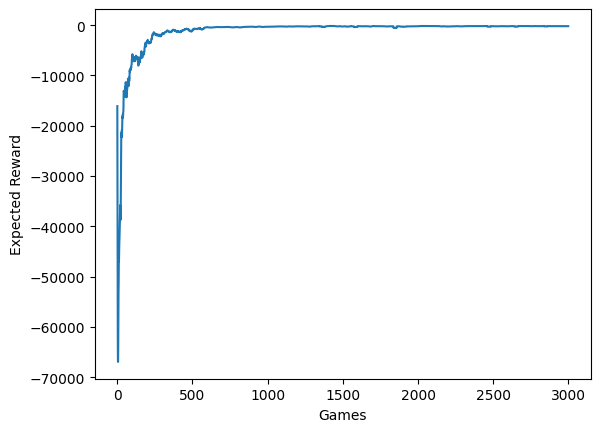

In [ ]:

expected_rewards = np.zeros(n_games)
for t in range(n_games):
    expected_rewards[t] = np.mean(total_rewards[max(0, t-20):(t+1)])
plt.plot(expected_rewards)
plt.xlabel("Games")
plt.ylabel("Expected Reward")
plt.savefig('mountaincar.png')
